# Getting Started

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [37]:
pd.set_option('display.max_rows', None)

In [38]:
# Download latest version of dataset
path = kagglehub.dataset_download("yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\elote\.cache\kagglehub\datasets\yanmaksi\big-startup-secsees-fail-dataset-from-crunchbase\versions\1


In [39]:
# List files in the dataset
files = os.listdir(path)
print("Files in the dataset:", files)

Files in the dataset: ['big_startup_secsees_dataset.csv']


In [40]:
# read csv into pandas dataframe
# reads first file in the dataset (verify if it is the correct file)
first_file = files[0]
print("Using file:", first_file)

# Read the file based on its extension
file_path = os.path.join(path, first_file)
if first_file.endswith('.csv'):
    df = pd.read_csv(file_path)

Using file: big_startup_secsees_dataset.csv


In [41]:
# get dimensions of df
df.shape

(66368, 14)

In [42]:
# get some sample records
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [43]:
df_by_countries = pd.DataFrame(df.groupby('country_code').size())
df_by_countries.sort_values(by=0, ascending=False)

,0
country_code,
USA,37601
GBR,3688
CAN,1925
IND,1596
CHN,1544
FRA,1135
DEU,1082
ISR,965
ESP,746


# TO DO: 

- look into possible bias due to overrepresented data (in USA, for example)
- Delete: 37176	/organization/mousera	Mousera
- Delete: 22208	/organization/gamewheel	Gamewheel	http://gamewheel.co
- Delete: harvard & trinity college (dublin)
- Update: 7409	/organization/blaze-bioscience	Blaze Bioscience	http://www.blazebioscience.com, first round 2013-06-26 last round 2019-02-01, 6 funding rounds
- Updated: 4776	/organization/atipica	Atipica	http://www.atipica.co, founded_at 2015-01-30

# Data Cleaning

### Missing values, either:
- drop rows
- drop columns
- fill in missing values with an appropriate value

In [490]:
# check columns for missing values in percentage
df.isnull().mean() * 100
# closest to zero is best, means 100% of data is filled.


permalink             0.000000
name                  0.001507
homepage_url          7.621143
category_list         4.743250
funding_total_usd     0.000000
status                0.000000
country_code         10.483968
state_code           12.878194
region               12.099204
city                 12.096191
funding_rounds        0.000000
founded_at           22.934245
first_funding_at      0.036162
last_funding_at       0.000000
dtype: float64

In [491]:
# Check for missing values in the dataset (by number of missing values)
missing_info = df.isnull().sum()
print(missing_info[missing_info > 0])   # print columns with missing values

name                    1
homepage_url         5058
category_list        3148
country_code         6958
state_code           8547
region               8030
city                 8028
founded_at          15221
first_funding_at       24
dtype: int64


# GO BACK
* dropping rows with missing values for now, decide what to do later

In [492]:
# drop rows with missing values
df = df.dropna()

In [493]:
# check columns for missing values in percentage
df.isnull().mean() * 100

permalink            0.0
name                 0.0
homepage_url         0.0
category_list        0.0
funding_total_usd    0.0
status               0.0
country_code         0.0
state_code           0.0
region               0.0
city                 0.0
funding_rounds       0.0
founded_at           0.0
first_funding_at     0.0
last_funding_at      0.0
dtype: float64

In [494]:
# check for duplicates
duplicates = df.duplicated()
print(duplicates[duplicates == True])

Series([], dtype: bool)


In [495]:
# Calculating percent unique values for each column
unique_percent = [(col, df[col].nunique() / len(df) * 100) for col in df.columns]

# Creating a DataFrame with the results
unique_df = pd.DataFrame(unique_percent, columns=['Column Name', 'Percent Unique'])

print(unique_df)

          Column Name  Percent Unique
0           permalink      100.000000
1                name       99.762686
2        homepage_url       99.881343
3       category_list       47.897908
4   funding_total_usd       32.439915
5              status        0.009306
6        country_code        0.251274
7          state_code        0.667737
8              region        2.296364
9                city        9.325051
10     funding_rounds        0.044206
11         founded_at        8.520044
12   first_funding_at        9.857844
13    last_funding_at        8.762011


### Dates Validation

* check how many dates are outside of pandas datetime range so we can convert to datetime
* drop rows where appropriate

In [496]:
import pandas as pd
from datetime import datetime

def validate_date_strings(df, date_columns):
    """
    Check what percentage of date strings in specified columns fall outside pandas datetime range
    without attempting to convert invalid dates.
    
    Pandas datetime range: 1677-09-22 to 2262-04-11
    """
    min_date = datetime(1677, 9, 22)
    max_date = datetime(2262, 4, 11)
    results = {}
    
    for col in date_columns:
        total = len(df[col])
        invalid_count = 0
        
        for date_str in df[col]:
            try:
                if pd.isna(date_str):
                    continue
                    
                # Parse string to datetime without pandas
                date = datetime.strptime(date_str, '%Y-%m-%d')
                
                # Check if outside valid range
                if date < min_date or date > max_date:
                    invalid_count += 1
                    
            except ValueError:
                invalid_count += 1
                
        invalid_pct = (invalid_count / total) * 100 if total > 0 else 0
        results[col] = {
            'total_rows': total,
            'invalid_count': invalid_count,
            'invalid_percentage': round(invalid_pct, 2)
        }
        
    return results

# Example usage:
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at']
results = validate_date_strings(df, date_cols)
print(results)

{'founded_at': {'total_rows': 42981, 'invalid_count': 1, 'invalid_percentage': 0.0}, 'first_funding_at': {'total_rows': 42981, 'invalid_count': 2, 'invalid_percentage': 0.0}, 'last_funding_at': {'total_rows': 42981, 'invalid_count': 0, 'invalid_percentage': 0.0}}


In [497]:
import pandas as pd
from datetime import datetime

def filter_invalid_dates(df, date_columns):
    """
    Remove rows where any specified date column falls outside pandas datetime range
    (1677-09-22 to 2262-04-11) or contains invalid date format
    """
    min_date = datetime(1677, 9, 22)
    max_date = datetime(2262, 4, 11)
    
    # Create a boolean mask for valid dates
    valid_mask = pd.Series(True, index=df.index)
    
    for col in date_columns:
        col_mask = df[col].apply(lambda x: True if pd.isna(x) else False)  # Keep NaN values
        
        def check_date(x):
            if pd.isna(x):
                return True
            try:
                date = datetime.strptime(x, '%Y-%m-%d')
                return min_date <= date <= max_date
            except ValueError:
                return False
        
        valid_dates = df[col].apply(check_date)
        valid_mask &= valid_dates
    
    # Return filtered dataframe and number of dropped rows
    filtered_df = df[valid_mask]
    dropped_count = len(df) - len(filtered_df)
    
    return filtered_df, dropped_count

# Example usage:
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at']
df, n_dropped = filter_invalid_dates(df, date_cols)

print(f"Rows dropped: {n_dropped}")

Rows dropped: 3


### Data Type Validation

* check data type for each column
* convert where appropriate

In [498]:
df.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

In [499]:
# change data type of founded_at, first_funding_at, last_funding_at to datetime
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

# change data type of funding_total_usd to float
# Replace '-' with NaN first
df['funding_total_usd'] = df['funding_total_usd'].replace('-', float('nan'))
df['funding_total_usd'] = df['funding_total_usd'].astype(float)

# verify data types
df.dtypes

permalink                    object
name                         object
homepage_url                 object
category_list                object
funding_total_usd           float64
status                       object
country_code                 object
state_code                   object
region                       object
city                         object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
dtype: object

### Numerical Values Validation
* max funding rounds is 16 which is not unheard of, so let's keep it
* max funding total amount is very high which we can say is extreme outlier; remove these

In [500]:
cols = df.columns
print(cols)

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')


In [501]:
df['country_code'].value_counts()

country_code
USA    28048
GBR     2580
CAN     1413
IND     1253
FRA      838
       ...  
QAT        1
TGO        1
CMR        1
IRN        1
PRY        1
Name: count, Length: 108, dtype: int64

In [502]:
df['region'].value_counts()

region
SF Bay Area      7080
New York City    2910
London           1838
Boston           1731
Los Angeles      1485
                 ... 
Clevedon            1
Knutsford           1
Santander           1
Roswell             1
Hereford            1
Name: count, Length: 987, dtype: int64

In [503]:
df['state_code'].value_counts()

state_code
CA    10145
NY     3204
MA     1820
H9     1559
TX     1408
      ...  
C2        1
V3        1
W2        1
79        1
G4        1
Name: count, Length: 287, dtype: int64

In [504]:
# check distribution of funding_rounds column
df['funding_rounds'].describe()

count    42978.000000
mean         1.946205
std          1.528271
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: funding_rounds, dtype: float64

In [505]:
df['city'].value_counts()

city
San Francisco         2963
New York              2623
London                1562
Seattle                609
Palo Alto              606
                      ... 
Kunming                  1
Schwäbisch Gmünd         1
Bel Air                  1
Meiningen                1
Gerasdorf Bei Wien       1
Name: count, Length: 4008, dtype: int64

In [506]:
# check distribution of funding_total_usd column
df['funding_total_usd'].describe()

count    3.654900e+04
mean     2.021896e+07
std      2.095889e+08
min      1.000000e+00
25%      3.950000e+05
50%      2.025000e+06
75%      1.080000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [507]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Remove outliers from the 'funding_total_usd' column
df = remove_outliers(df, 'funding_total_usd')


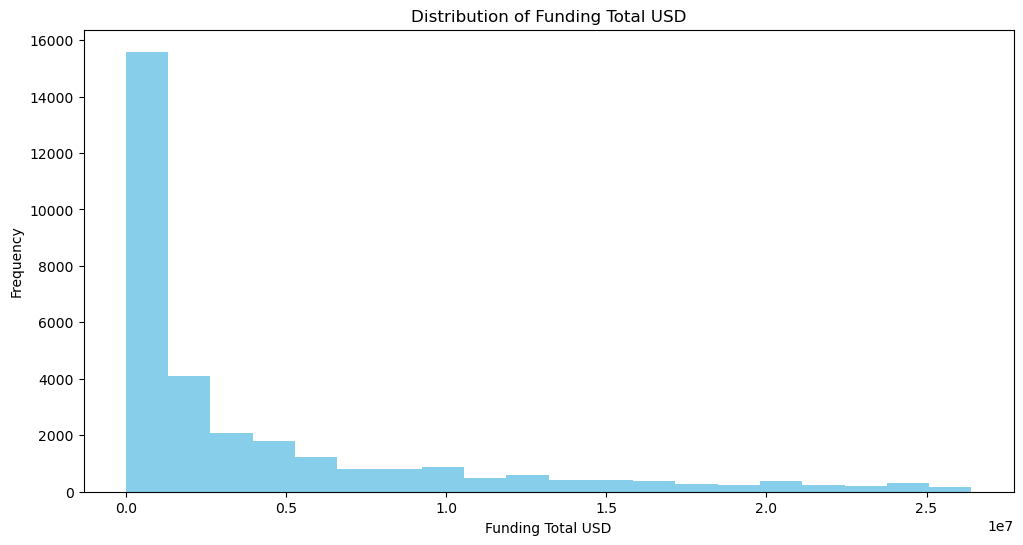

In [508]:
# visualize distribution of funding_total_usd column
plt.figure(figsize=(12, 6))
plt.hist(df['funding_total_usd'], bins=20, color='skyblue')
plt.title('Distribution of Funding Total USD')
plt.xlabel('Funding Total USD')
plt.ylabel('Frequency')
plt.show()

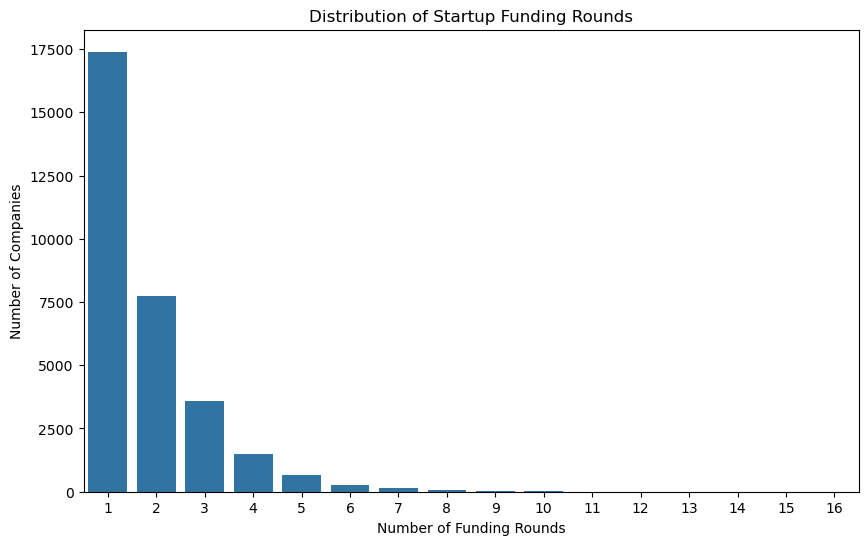

In [509]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='funding_rounds')

# Customize the plot
plt.title('Distribution of Startup Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Number of Companies')

# Show the plot
plt.show()

### Feature Engineering
* break up dates into features

In [510]:
# First, convert to datetime if not already
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at']
# for col in date_cols:
#     df[col] = pd.to_datetime(df[col])

# Basic analysis of dates
print("Date range for each column:")
for col in date_cols:
    print(f"\n{col}:")
    print(f"Range: {df[col].min()} to {df[col].max()}")
    print(f"Null values: {df[col].isnull().sum()}")
    print(f"Unique values: {df[col].nunique()}")

# Create useful derived features
df['days_to_first_funding'] = (df['first_funding_at'] - df['founded_at']).dt.days
df['funding_duration'] = (df['last_funding_at'] - df['first_funding_at']).dt.days
df['company_age_at_last_funding'] = (df['last_funding_at'] - df['founded_at']).dt.days

# Extract year and month features
for col in date_cols:
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    
# Time-based features
df['founded_quarter'] = df['founded_at'].dt.quarter
df['is_founded_recession_2008'] = ((df['founded_at'].dt.year >= 2008) & 
                                 (df['founded_at'].dt.year <= 2009)).astype(int)
df['is_founded_covid'] = (df['founded_at'].dt.year >= 2020).astype(int)

# Summary statistics of the new features
print("\nSummary of derived time features:")
time_features = ['days_to_first_funding', 'funding_duration', 'company_age_at_last_funding']
print(df[time_features].describe())

# Check for any illogical values
print("\nChecking for illogical values:")
print("Negative days to first funding:", 
      (df['days_to_first_funding'] < 0).sum())
print("Negative funding duration:", 
      (df['funding_duration'] < 0).sum())

Date range for each column:

founded_at:
Range: 1766-01-01 00:00:00 to 2104-01-01 00:00:00
Null values: 0
Unique values: 3111

first_funding_at:
Range: 1977-05-15 00:00:00 to 2015-12-05 00:00:00
Null values: 0
Unique values: 3783

last_funding_at:
Range: 1977-05-15 00:00:00 to 2105-05-01 00:00:00
Null values: 0
Unique values: 3464

Summary of derived time features:
       days_to_first_funding  funding_duration  company_age_at_last_funding
count           31403.000000      31403.000000                 31403.000000
mean             1272.494539        353.469159                  1625.963698
std              3286.982811        627.370299                  3312.289102
min            -33055.000000          0.000000                -33055.000000
25%               151.500000          0.000000                   375.000000
50%               516.000000          0.000000                   886.000000
75%              1294.000000        538.000000                  1827.000000
max             91028.00

In [511]:
# Store original length
original_len = len(df)

# Get today's date
today = pd.Timestamp.today()

df = df[
   # No future dates in last_funding_at
   (df['last_funding_at'] <= today) &
   # First funding should be after founding
   (df['days_to_first_funding'] >= 0) &
   # Last funding should be after first funding
   (df['funding_duration'] >= 0) &
   # All dates should exist (not null)
   df[date_cols].notna().all(axis=1)
]

# Show how many rows were dropped
rows_dropped = original_len - len(df)
print(f"Dropped {rows_dropped} rows ({(rows_dropped/original_len)*100:.2f}% of data)")
print(f"Remaining rows: {len(df)}")

# Verify no more illogical values exist
print("\nVerifying no illogical values remain:")
print("Negative days to first funding:", (df['days_to_first_funding'] < 0).sum())
print("Negative funding duration:", (df['funding_duration'] < 0).sum())
print("Null dates:", df[date_cols].isnull().sum())

Dropped 2222 rows (7.08% of data)
Remaining rows: 29181

Verifying no illogical values remain:
Negative days to first funding: 0
Negative funding duration: 0
Null dates: founded_at          0
first_funding_at    0
last_funding_at     0
dtype: int64


In [512]:
# Basic analysis of dates
print("Date range for each column:")
for col in date_cols:
    print(f"\n{col}:")
    print(f"Range: {df[col].min()} to {df[col].max()}")
    print(f"Null values: {df[col].isnull().sum()}")
    print(f"Unique values: {df[col].nunique()}")
    
# Summary statistics of the new features
print("\nSummary of derived time features:")
time_features = ['days_to_first_funding', 'funding_duration', 'company_age_at_last_funding']
print(df[time_features].describe())

Date range for each column:

founded_at:
Range: 1766-01-01 00:00:00 to 2015-11-01 00:00:00
Null values: 0
Unique values: 2910

first_funding_at:
Range: 1977-05-15 00:00:00 to 2015-12-05 00:00:00
Null values: 0
Unique values: 3713

last_funding_at:
Range: 1977-05-15 00:00:00 to 2015-12-07 00:00:00
Null values: 0
Unique values: 3407

Summary of derived time features:
       days_to_first_funding  funding_duration  company_age_at_last_funding
count           29181.000000      29181.000000                 29181.000000
mean             1391.820260        338.890237                  1730.710497
std              3372.046217        586.006441                  3396.227239
min                 0.000000          0.000000                     0.000000
25%               223.000000          0.000000                   431.000000
50%               579.000000          0.000000                   945.000000
75%              1399.000000        510.000000                  1925.000000
max             91028.00

In [513]:
df.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,company_age_at_last_funding,founded_at_year,founded_at_month,first_funding_at_year,first_funding_at_month,last_funding_at_year,last_funding_at_month,founded_quarter,is_founded_recession_2008,is_founded_covid
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,...,443,2007,1,2008,3,2008,3,1,0,0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851.0,operating,CAN,BC,Vancouver,Vancouver,...,4737,1997,1,2009,9,2009,12,1,0,0
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000.0,operating,CHL,12,Santiago,Las Condes,...,414,2012,1,2013,2,2013,2,1,0,0
13,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,Health and Wellness,1750000.0,operating,USA,NJ,Newark,Iselin,...,9922,1984,1,2011,3,2011,3,1,0,0
14,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,6000000.0,operating,USA,NY,New York City,New York,...,465,2013,10,2015,2,2015,2,4,0,0
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.0,acquired,USA,CA,SF Bay Area,Cupertino,...,1111,2012,3,2015,3,2015,3,1,0,0
17,/organization/10-20-media,10-20 Media,http://www.10-20media.com,E-Commerce,2050000.0,operating,USA,MD,Baltimore,Woodbine,...,4013,2001,1,2009,6,2011,12,1,0,0
18,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,4400000.0,operating,GBR,H9,London,London,...,646,2013,1,2013,1,2014,10,1,0,0
19,/organization/1000-corks,1000 Corks,http://1000corks.com,Search,40000.0,operating,USA,OR,"Portland, Oregon",Lake Oswego,...,1330,2008,1,2011,8,2011,8,1,1,0
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.0,acquired,USA,WA,Seattle,Seattle,...,134,2009,1,2009,5,2009,5,1,1,0


In [514]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 29181 entries, 3 to 66366
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   permalink                    29181 non-null  object        
 1   name                         29181 non-null  object        
 2   homepage_url                 29181 non-null  object        
 3   category_list                29181 non-null  object        
 4   funding_total_usd            29181 non-null  float64       
 5   status                       29181 non-null  object        
 6   country_code                 29181 non-null  object        
 7   state_code                   29181 non-null  object        
 8   region                       29181 non-null  object        
 9   city                         29181 non-null  object        
 10  funding_rounds               29181 non-null  int64         
 11  founded_at                   29181 non-null  d

# MODEL

## TO DO:
* how to parse the data given the 'status' column for training, testing, etc.

* Let's start by focusing only on USA + CAN + GBR data
* later we can expand to keeping all data with binary feature "is_USA"; caveat is whether we have enough other data
* let's also keep 'region' for balance of cardinality and information value, and drop city and state for modeling

### Feature Engineering


In [515]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 29181 entries, 3 to 66366
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   permalink                    29181 non-null  object        
 1   name                         29181 non-null  object        
 2   homepage_url                 29181 non-null  object        
 3   category_list                29181 non-null  object        
 4   funding_total_usd            29181 non-null  float64       
 5   status                       29181 non-null  object        
 6   country_code                 29181 non-null  object        
 7   state_code                   29181 non-null  object        
 8   region                       29181 non-null  object        
 9   city                         29181 non-null  object        
 10  funding_rounds               29181 non-null  int64         
 11  founded_at                   29181 non-null  d

In [516]:
df['category_list'].head(8)

3                                   Curated Web
6                                 Biotechnology
9                                    E-Commerce
13                          Health and Wellness
14    Internet Marketing|Media|Public Relations
15             Apps|Cable|Distribution|Software
17                                   E-Commerce
18                                    Education
Name: category_list, dtype: object

In [517]:
# Look at some statistics
print("Sample of unique category combinations:")
print(df['category_list'].value_counts().head())

print("\nTotal unique category combinations:")
print(df['category_list'].nunique())

# Get list of all unique individual categories
all_categories = set()
df['category_list'].str.split('|').dropna().apply(all_categories.update)
print("\nTotal unique individual categories:", len(all_categories))
print("\nSample of individual categories:")
print(list(all_categories)[:10])

Sample of unique category combinations:
category_list
Software               2153
Biotechnology          1451
E-Commerce              576
Mobile                  541
Hardware + Software     510
Name: count, dtype: int64

Total unique category combinations:
14557

Total unique individual categories: 835

Sample of individual categories:
['Home Renovation', 'Social Recruiting', 'Neuroscience', 'Colleges', 'Internet Technology', 'Designers', 'Disruptive Models', 'Mobile Payments', 'Computer Vision', 'Defense']


In [518]:
# # Export just the category_list column
# df['category_list'].to_csv('category_list.csv', index=False)

# # If you want to also include the counts of each category combination:
# df['category_list'].value_counts().to_csv('category_list_with_counts.csv')

# # If you want to see all unique individual categories with their counts:
# all_categories = {}
# for categories in df['category_list'].dropna().str.split('|'):
#     for category in categories:
#         all_categories[category] = all_categories.get(category, 0) + 1

# # Convert to dataframe and save
# category_counts_df = pd.DataFrame.from_dict(all_categories, orient='index', columns=['count'])
# category_counts_df.sort_values('count', ascending=False).to_csv('individual_categories_counts.csv')

In [519]:
# Define all our keyword groups (same as before)
tech_keywords = ['Software', 'Enterprise Software', 'SaaS', 'Cloud Computing', 
                'Hardware + Software', 'Information Technology', 'Technology']

health_keywords = ['Biotechnology', 'Health and Wellness', 'Health Care', 
                  'Medical', 'Medical Devices', 'Pharmaceuticals', 'Life Sciences']

mobile_keywords = ['Mobile', 'Apps', 'Android', 'iOS', 'iPhone', 'iPad', 
                  'Mobile Commerce', 'Mobile Payments']

social_keywords = ['Social Media', 'Social Network Media', 'Social Commerce',
                  'Social Games', 'Social Media Marketing']

data_keywords = ['Analytics', 'Big Data', 'Big Data Analytics', 
                'Predictive Analytics', 'Data Mining', 'Data Visualization']

finance_keywords = ['Finance', 'FinTech', 'Financial Services', 'Payments',
                   'Banking', 'Insurance', 'Investment Management']

def create_category_features(df):
    """
    Create category-based features from the category_list column
    Returns categories in column format instead of binary flags
    """
    # Create a copy to avoid modifying the original
    df_new = df.copy()
    
    # Initialize new columns
    df_new['sectors'] = ''
    df_new['top_categories'] = ''
    
    # Create sector mapping
    sector_keywords = {
        'Tech': tech_keywords,
        'Health': health_keywords,
        'Mobile': mobile_keywords,
        'Social': social_keywords,
        'Data': data_keywords,
        'Finance': finance_keywords
    }
    
    # Add sectors
    for idx, row in df_new.iterrows():
        sectors = []
        if pd.notna(row['category_list']):
            # Check each sector
            for sector, keywords in sector_keywords.items():
                if any(keyword in row['category_list'] for keyword in keywords):
                    sectors.append(sector)
        df_new.at[idx, 'sectors'] = '|'.join(sectors) if sectors else 'None'
        
        # Check top categories
        top_cats = []
        if pd.notna(row['category_list']):
            for category in top_tier:
                if category in row['category_list']:
                    top_cats.append(category)
        df_new.at[idx, 'top_categories'] = '|'.join(top_cats) if top_cats else 'None'
    
    # Add category count (using raw string for escape sequence)
    df_new['category_count'] = df_new['category_list'].str.count(r'\|') + 1
    df_new['sector_count'] = df_new['sectors'].str.count(r'\|') + 1
    
    return df_new

# Example usage:
df = create_category_features(df)

# Display results
print("\nSample of categorized data:")
print(df[['category_list', 'sectors', 'top_categories', 'category_count', 'sector_count']].head())

# Show distribution of sectors
print("\nSector combinations distribution:")
print(df['sectors'].value_counts().head(10))

print("\nTop categories combinations distribution:")
print(df['top_categories'].value_counts().head(10))


Sample of categorized data:
                                category_list sectors top_categories  \
3                                 Curated Web    None    Curated Web   
6                               Biotechnology  Health  Biotechnology   
9                                  E-Commerce    None     E-Commerce   
13                        Health and Wellness  Health           None   
14  Internet Marketing|Media|Public Relations    None           None   

    category_count  sector_count  
3                1             1  
6                1             1  
9                1             1  
13               1             1  
14               3             1  

Sector combinations distribution:
sectors
None             10503
Tech              6723
Health            3227
Mobile            2168
Social            1221
Tech|Mobile        842
Finance            838
Data               639
Tech|Data          495
Mobile|Social      418
Name: count, dtype: int64

Top categories combinations 

### Filter for relevant columns and rows for modeling

In [520]:
print(df.columns)

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'days_to_first_funding', 'funding_duration',
       'company_age_at_last_funding', 'founded_at_year', 'founded_at_month',
       'first_funding_at_year', 'first_funding_at_month',
       'last_funding_at_year', 'last_funding_at_month', 'founded_quarter',
       'is_founded_recession_2008', 'is_founded_covid', 'sectors',
       'top_categories', 'category_count', 'sector_count'],
      dtype='object')


In [521]:
# List of columns we want to keep
columns_to_keep = ['funding_total_usd', 'status', 'country_code', #'region',
                 'funding_rounds', 'founded_at', 'last_funding_at', 
                 'days_to_first_funding', 'funding_duration',
                 'company_age_at_last_funding', 'founded_at_year', 
                 'founded_at_month', 'first_funding_at_year', 
                 'first_funding_at_month', 'last_funding_at_year', 
                 'last_funding_at_month', 'founded_quarter',
                 'is_founded_recession_2008', 'is_founded_covid', 'sectors',
                  'top_categories', 'category_count', 'sector_count']

# Filter for selected countries and columns
df = df[
   # Country filter
   (df['country_code'].isin(['USA', 'GBR', 'CAN']))
   # Select columns
][columns_to_keep]

# Show results
print("Original shape:", df.shape)
print("New shape:", df_model.shape)
print("\nData distribution by country:")
print(df_model['country_code'].value_counts())

Original shape: (21826, 22)
New shape: (21826, 23)

Data distribution by country:
country_code
USA    18940
GBR     1875
CAN     1011
Name: count, dtype: int64


In [522]:
def one_hot_encode_columns(df):
   # Function to one-hot encode pipe-separated columns
   def one_hot_encode_piped_columns(df, column_name):
       temp_df = df[column_name].str.get_dummies(sep='|')
       if 'None' in temp_df.columns:
           temp_df = temp_df.drop('None', axis=1)
       temp_df = temp_df.add_prefix(f'{column_name}_')
       return temp_df
   
   # Create one-hot encoded features for pipe-separated columns
   sectors_encoded = one_hot_encode_piped_columns(df, 'sectors')
   top_cats_encoded = one_hot_encode_piped_columns(df, 'top_categories')
   
   # One-hot encode regular categorical columns
   #region_encoded = pd.get_dummies(df['region'], prefix='region')
   country_encoded = pd.get_dummies(df['country_code'], prefix='country')
   
   # Combine all features
   df_encoded = pd.concat([
       df,
       sectors_encoded,
       top_cats_encoded,
       #region_encoded,
       country_encoded
   ], axis=1)
   
   # Drop original categorical columns
   #columns_to_drop = ['sectors', 'top_categories', 'region', 'country_code']
   columns_to_drop = ['sectors', 'top_categories', 'country_code']
   df_encoded = df_encoded.drop(columns_to_drop, axis=1)
   
   return df_encoded

# Apply encoding
df_final = one_hot_encode_columns(df)

# Show results
print("Original shape:", df.shape)
print("New shape:", df_final.shape)
print("\nNew column groups:")
print("\nSector columns:", [col for col in df_final.columns if col.startswith('sectors_')])
print("\nTop category columns:", [col for col in df_final.columns if col.startswith('top_categories_')])
print("\nRegion columns:", [col for col in df_final.columns if col.startswith('region_')])
print("\nCountry columns:", [col for col in df_final.columns if col.startswith('country_')])

# Show sample of encoded data
print("\nSample of encoded data (first few columns):")
encoded_cols = [col for col in df_final.columns if col.startswith(('sectors_', 'region_', 'country_'))]
print(df_final[encoded_cols[:5]].head())

Original shape: (21826, 22)
New shape: (21826, 37)

New column groups:

Sector columns: ['sectors_Data', 'sectors_Finance', 'sectors_Health', 'sectors_Mobile', 'sectors_Social', 'sectors_Tech']

Top category columns: ['top_categories_Advertising', 'top_categories_Biotechnology', 'top_categories_Curated Web', 'top_categories_E-Commerce', 'top_categories_Enterprise Software', 'top_categories_Mobile', 'top_categories_SaaS', 'top_categories_Social Media', 'top_categories_Software']

Region columns: []

Country columns: ['country_CAN', 'country_GBR', 'country_USA']

Sample of encoded data (first few columns):
    sectors_Data  sectors_Finance  sectors_Health  sectors_Mobile  \
6              0                0               1               0   
13             0                0               1               0   
14             0                0               0               0   
15             0                0               0               1   
17             0                0          

In [523]:
df_final.shape

(21826, 37)

In [524]:
df_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 21826 entries, 6 to 66366
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   funding_total_usd                   21826 non-null  float64       
 1   status                              21826 non-null  object        
 2   funding_rounds                      21826 non-null  int64         
 3   founded_at                          21826 non-null  datetime64[ns]
 4   last_funding_at                     21826 non-null  datetime64[ns]
 5   days_to_first_funding               21826 non-null  int64         
 6   funding_duration                    21826 non-null  int64         
 7   company_age_at_last_funding         21826 non-null  int64         
 8   founded_at_year                     21826 non-null  int32         
 9   founded_at_month                    21826 non-null  int32         
 10  first_funding_at_year      

# modeling processing

Status categories: {'acquired': 0, 'closed': 1, 'ipo': 2, 'operating': 3}

Performing cross-validation...

Logistic Regression Cross-Validation Scores: [0.82321497 0.81901489 0.82436044 0.81634212 0.82245132]
Logistic Regression Average CV Score: 0.821 (+/- 0.006)

Random Forest Cross-Validation Scores: [0.81939672 0.82474227 0.82321497 0.82206949 0.82436044]
Random Forest Average CV Score: 0.823 (+/- 0.004)

XGBoost Cross-Validation Scores: [0.82703322 0.82550592 0.82512409 0.82168767 0.82245132]
XGBoost Average CV Score: 0.824 (+/- 0.004)

Training and evaluating models...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    acquired       0.45      0.17      0.25       416
      closed       0.38      0.02      0.03       300
         ipo       0.25      0.01      0.02        82
   operating       0.83      0.98      0.90      3567

    accuracy                           0.82      4365
   macro avg       0.48      0.30      0.30     

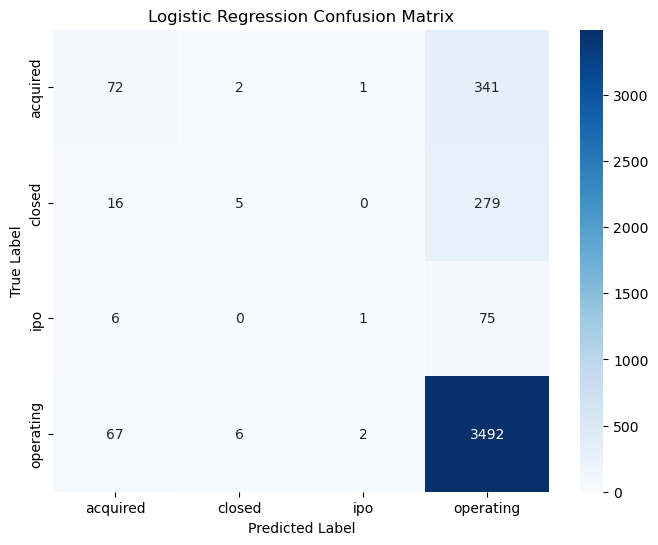


Random Forest Classification Report:
              precision    recall  f1-score   support

    acquired       0.46      0.19      0.27       416
      closed       0.26      0.05      0.08       300
         ipo       0.00      0.00      0.00        82
   operating       0.84      0.97      0.90      3567

    accuracy                           0.82      4365
   macro avg       0.39      0.30      0.31      4365
weighted avg       0.75      0.82      0.77      4365



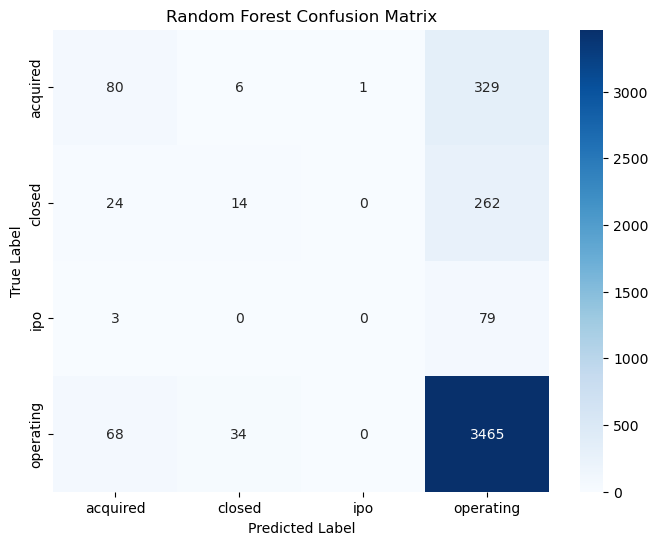


XGBoost Classification Report:
              precision    recall  f1-score   support

    acquired       0.44      0.22      0.29       416
      closed       0.38      0.04      0.08       300
         ipo       0.00      0.00      0.00        82
   operating       0.84      0.97      0.90      3567

    accuracy                           0.82      4365
   macro avg       0.42      0.31      0.32      4365
weighted avg       0.76      0.82      0.77      4365



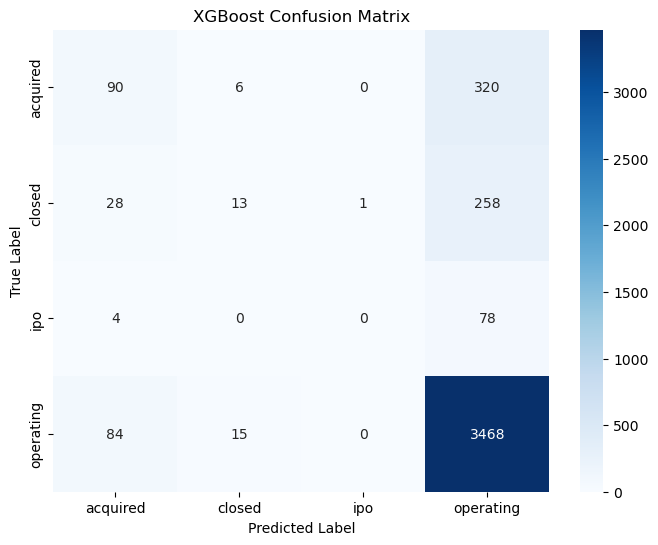


Plotting feature importance comparison...


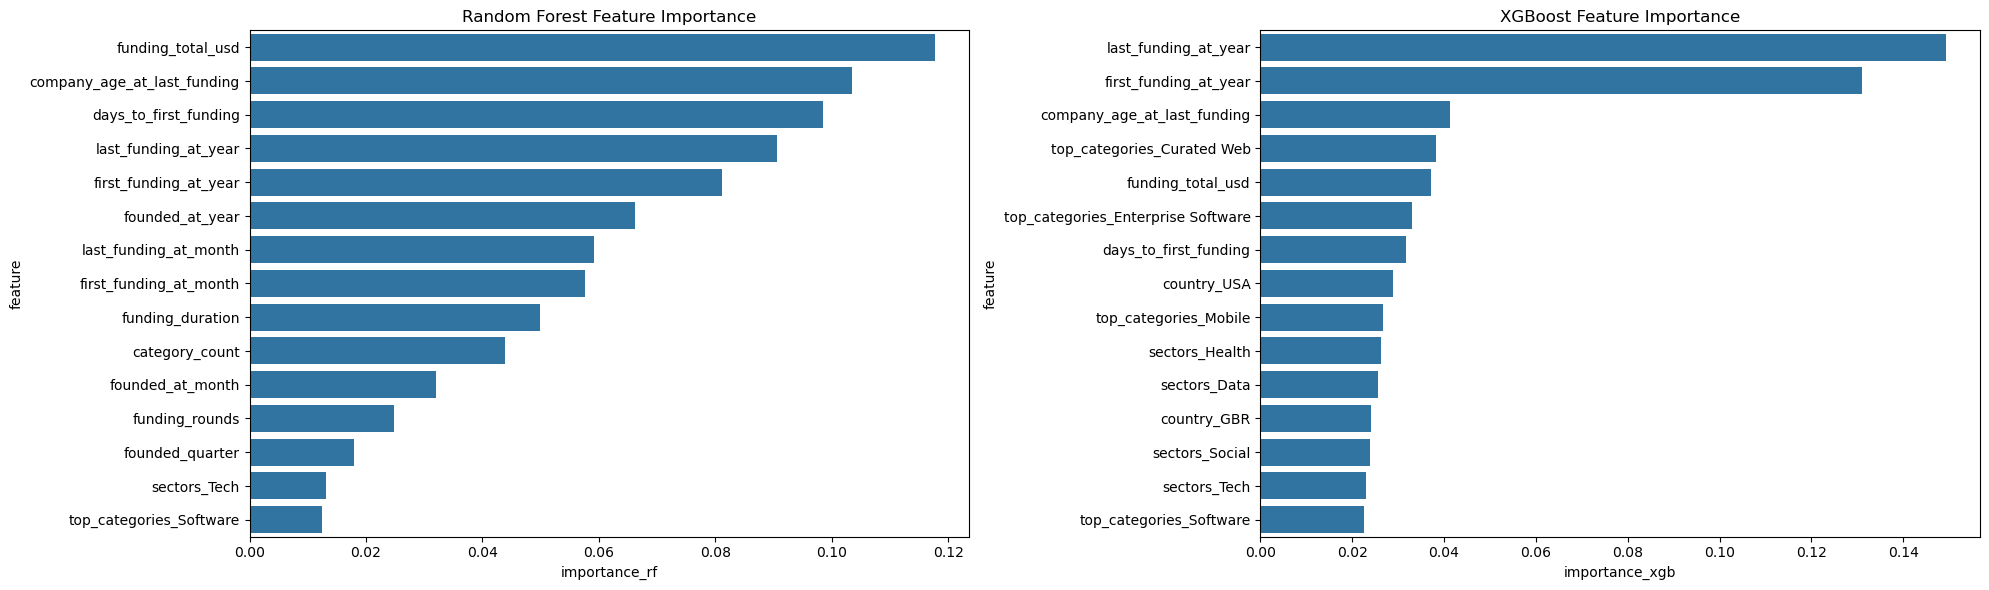


Top 10 Most Important Features (Random Forest vs XGBoost):
                        feature  importance_rf  importance_xgb
0             funding_total_usd       0.117672        0.037258
4   company_age_at_last_funding       0.103361        0.041325
2         days_to_first_funding       0.098416        0.031705
9          last_funding_at_year       0.090529        0.149257
7         first_funding_at_year       0.081069        0.130944
5               founded_at_year       0.066102        0.019793
10        last_funding_at_month       0.059145        0.022511
8        first_funding_at_month       0.057660        0.017902
3              funding_duration       0.049911        0.022384
14               category_count       0.043845        0.021133

Final evaluation on test set...

Logistic Regression Final Test Set Performance:
              precision    recall  f1-score   support

    acquired       0.45      0.20      0.28       418
      closed       0.50      0.01      0.02       319
  

In [526]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df_final['status'])
print("Status categories:", dict(zip(le.classes_, le.transform(le.classes_))))

# Separate features and target
X = df_final.drop(['status', 'founded_at', 'last_funding_at'], axis=1)

# First split: separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second split: separate validation set from training
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['funding_total_usd', 'funding_rounds', 'days_to_first_funding', 
                 'funding_duration', 'company_age_at_last_funding', 'founded_at_year',
                 'founded_at_month', 'first_funding_at_year', 'first_funding_at_month',
                 'last_funding_at_year', 'last_funding_at_month', 'founded_quarter',
                 'category_count', 'sector_count']

# Binary columns (no need to scale these)
binary_cols = [col for col in X.columns if col not in numerical_cols]

# Scale only numerical columns
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val_scaled[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Define models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='mlogloss'  # for multi-class classification
)

# Modify train_and_evaluate to store and return metrics
def train_and_evaluate(model, X_train, X_val, y_train, y_val, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Get classification report as dict
    report = classification_report(y_val, y_pred, target_names=le.classes_, output_dict=True)
    
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_val, y_pred, target_names=le.classes_))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return model, report

# Execute cross-validation for all models
print("\nPerforming cross-validation...")
models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

cv_scores = {}
for name, model in models.items():
    cv_scores[name] = perform_cv(model, X_train_scaled, y_train, name)

# Train and evaluate all models
print("\nTraining and evaluating models...")
trained_models = {}
model_reports = {}
for name, model in models.items():
    trained_models[name], model_reports[name] = train_and_evaluate(
        model, X_train_scaled, X_val_scaled, y_train, y_val, name
    )

# Feature importance comparison
def plot_feature_importance_comparison():
    # Get feature importance for each model
    importances = {}
    
    # Random Forest importance
    rf_imp = pd.DataFrame({
        'feature': X_train_scaled.columns,
        'importance_rf': trained_models['Random Forest'].feature_importances_
    })
    
    # XGBoost importance
    xgb_imp = pd.DataFrame({
        'feature': X_train_scaled.columns,
        'importance_xgb': trained_models['XGBoost'].feature_importances_
    })
    
    # Merge importances
    all_imp = rf_imp.merge(xgb_imp, on='feature')
    
    # Plot top 15 features for both models
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    # Random Forest
    rf_sorted = all_imp.sort_values('importance_rf', ascending=False).head(15)
    sns.barplot(x='importance_rf', y='feature', data=rf_sorted, ax=ax1)
    ax1.set_title('Random Forest Feature Importance')
    
    # XGBoost
    xgb_sorted = all_imp.sort_values('importance_xgb', ascending=False).head(15)
    sns.barplot(x='importance_xgb', y='feature', data=xgb_sorted, ax=ax2)
    ax2.set_title('XGBoost Feature Importance')
    
    plt.tight_layout()
    plt.show()
    
    return all_imp

# Plot feature importance comparison
print("\nPlotting feature importance comparison...")
feature_importance_comparison = plot_feature_importance_comparison()
print("\nTop 10 Most Important Features (Random Forest vs XGBoost):")
print(feature_importance_comparison.sort_values('importance_rf', ascending=False).head(10))

# Final evaluation on test set
print("\nFinal evaluation on test set...")
for name, model in trained_models.items():
    final_evaluation(model, X_test_scaled, y_test, name)

def compare_models():
    # Create list to store results
    comparison_list = []
    
    for name in models.keys():
        comparison_list.append({
            'Model': name,
            'Cross-Val Score': cv_scores[name].mean(),
            'Cross-Val Std': cv_scores[name].std() * 2,
            'Validation F1 (weighted)': model_reports[name]['weighted avg']['f1-score']
        })
    
    # Convert list of dictionaries to DataFrame
    comparison = pd.DataFrame(comparison_list)
    return comparison

print("\nModel Performance Comparison:")
print(compare_models())

In [532]:
df_final.head().style

,funding_total_usd,status,funding_rounds,founded_at,last_funding_at,days_to_first_funding,funding_duration,company_age_at_last_funding,founded_at_year,founded_at_month,first_funding_at_year,first_funding_at_month,last_funding_at_year,last_funding_at_month,founded_quarter,is_founded_recession_2008,is_founded_covid,category_count,sector_count,sectors_Data,sectors_Finance,sectors_Health,sectors_Mobile,sectors_Social,sectors_Tech,top_categories_Advertising,top_categories_Biotechnology,top_categories_Curated Web,top_categories_E-Commerce,top_categories_Enterprise Software,top_categories_Mobile,top_categories_SaaS,top_categories_Social Media,top_categories_Software,country_CAN,country_GBR,country_USA
6,762851.000000,operating,2,1997-01-01 00:00:00,2009-12-21 00:00:00,4636,101,4737,1997,1,2009,9,2009,12,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,True,False,False
13,1750000.000000,operating,1,1984-01-01 00:00:00,2011-03-02 00:00:00,9922,0,9922,1984,1,2011,3,2011,3,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True
14,6000000.000000,operating,1,2013-10-24 00:00:00,2015-02-01 00:00:00,465,0,465,2013,10,2015,2,2015,2,4,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True
15,5000000.000000,acquired,1,2012-03-01 00:00:00,2015-03-17 00:00:00,1111,0,1111,2012,3,2015,3,2015,3,1,0,0,4,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,False,False,True
17,2050000.000000,operating,4,2001-01-01 00:00:00,2011-12-28 00:00:00,3090,923,4013,2001,1,2009,6,2011,12,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,False,False,True


In [533]:
df.head().style

,funding_total_usd,status,country_code,funding_rounds,founded_at,last_funding_at,days_to_first_funding,funding_duration,company_age_at_last_funding,founded_at_year,founded_at_month,first_funding_at_year,first_funding_at_month,last_funding_at_year,last_funding_at_month,founded_quarter,is_founded_recession_2008,is_founded_covid,sectors,top_categories,category_count,sector_count
6,762851.000000,operating,CAN,2,1997-01-01 00:00:00,2009-12-21 00:00:00,4636,101,4737,1997,1,2009,9,2009,12,1,0,0,Health,Biotechnology,1,1
13,1750000.000000,operating,USA,1,1984-01-01 00:00:00,2011-03-02 00:00:00,9922,0,9922,1984,1,2011,3,2011,3,1,0,0,Health,None,1,1
14,6000000.000000,operating,USA,1,2013-10-24 00:00:00,2015-02-01 00:00:00,465,0,465,2013,10,2015,2,2015,2,4,0,0,None,None,3,1
15,5000000.000000,acquired,USA,1,2012-03-01 00:00:00,2015-03-17 00:00:00,1111,0,1111,2012,3,2015,3,2015,3,1,0,0,Tech|Mobile,Software,4,2
17,2050000.000000,operating,USA,4,2001-01-01 00:00:00,2011-12-28 00:00:00,3090,923,4013,2001,1,2009,6,2011,12,1,0,0,None,E-Commerce,1,1


In [ ]:
# replace missing values in dataframe with pd.NA
for col in df.columns:
    df[col].fillna(pd.NA, inplace=True)

# df['name'].fillna(pd.NA, inplace=True)
# df['homepage_url'].fillna(pd.NA, inplace=True)
# df['category_list'].fillna(pd.NA, inplace=True)
# df['country_code'].fillna(pd.NA, inplace=True)
# df = df[df['state_code'].apply(lambda x: isinstance(x, str))]
# df.drop(columns=['city'], inplace=True)
# df.dropna(subset=['founded_at'], inplace=True)
# df.dropna(subset=['first_funding_at'], inplace=True)

Columns with Missing Data In Order of Concern:

1. founded_at: 22.934245%
2. state_code: 12.878194%
3. region: 12.099204%
4. city: 12.096191% 
5. country_code: 10.483968%
6. homepage_url: 7.621143%
7. category_list: 4.743250%
8. first_funding_at: 0.036162%
9. name: 0.001507%